In [124]:
from __future__ import print_function, division
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline




### lets try to plot sine and cosine graph using matplot lib

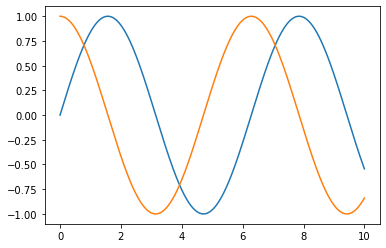

In [4]:
x = np.linspace(0,10,1000)
plt.plot(x,np.sin(x),x,np.cos(x))

### Lets set seaborn environment and redo the plotting

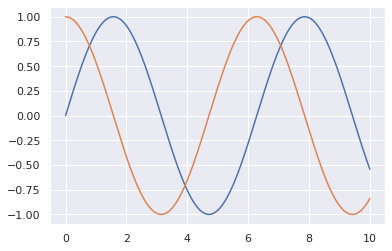

In [6]:
sb.set()
plt.plot(x,np.sin(x),x,np.cos(x))

#### What do you think about two plots. Yep, just by settting the seaborn envionment makes plot much better. Lets explore other features as well. 

### Let us try using Histograms, KDE and Densities

In [8]:
#let us create a pandas dataframe
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]], size = 2000)
data = pd.DataFrame(data, columns= ['x', 'y'])

### Lets plot the histogram of X and Y

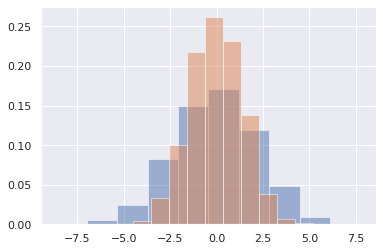

In [125]:
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

### Lets use seaborn to plot KDE

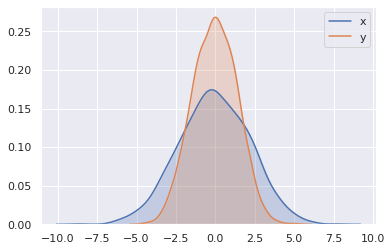

In [13]:
for col in 'xy':
    sb.kdeplot(data[col], shade=True)

### We can also plot KDE along with respective histogram

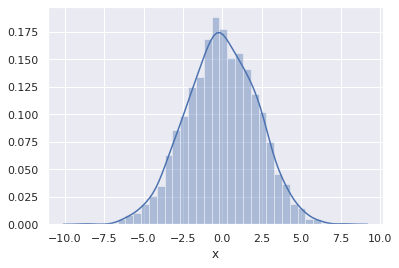

In [126]:
sb.distplot(data['x']);

### If we pass 2D dataset, we get 2D visulization of KDE


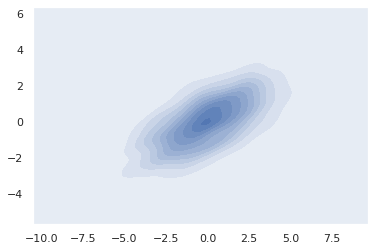

In [17]:
sb.kdeplot(data, shade=True)

## We can also plot marginal distribution together 

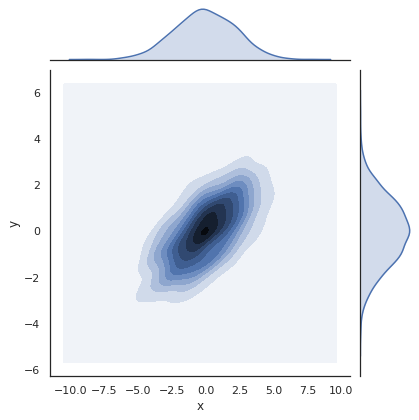

In [23]:
with sb.axes_style('white'):
    sb.jointplot("x", "y", data, kind="kde");

We can try other parameters in **joinplot** like **kind='hex'** to get hexagonally-based histogram

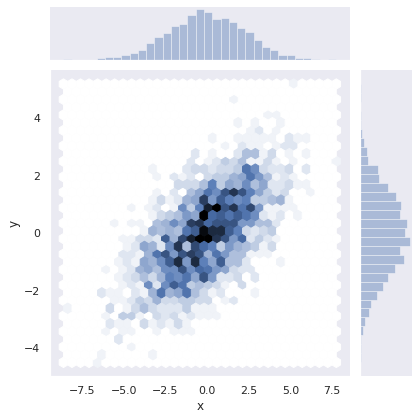

In [29]:
with sb.axes_style('dark'):
    sb.jointplot("x", "y", data, kind='hex')

The generalization version of joint plot for larger dimension dataset is *pair plots*. It is useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other

In [32]:
iris = sb.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


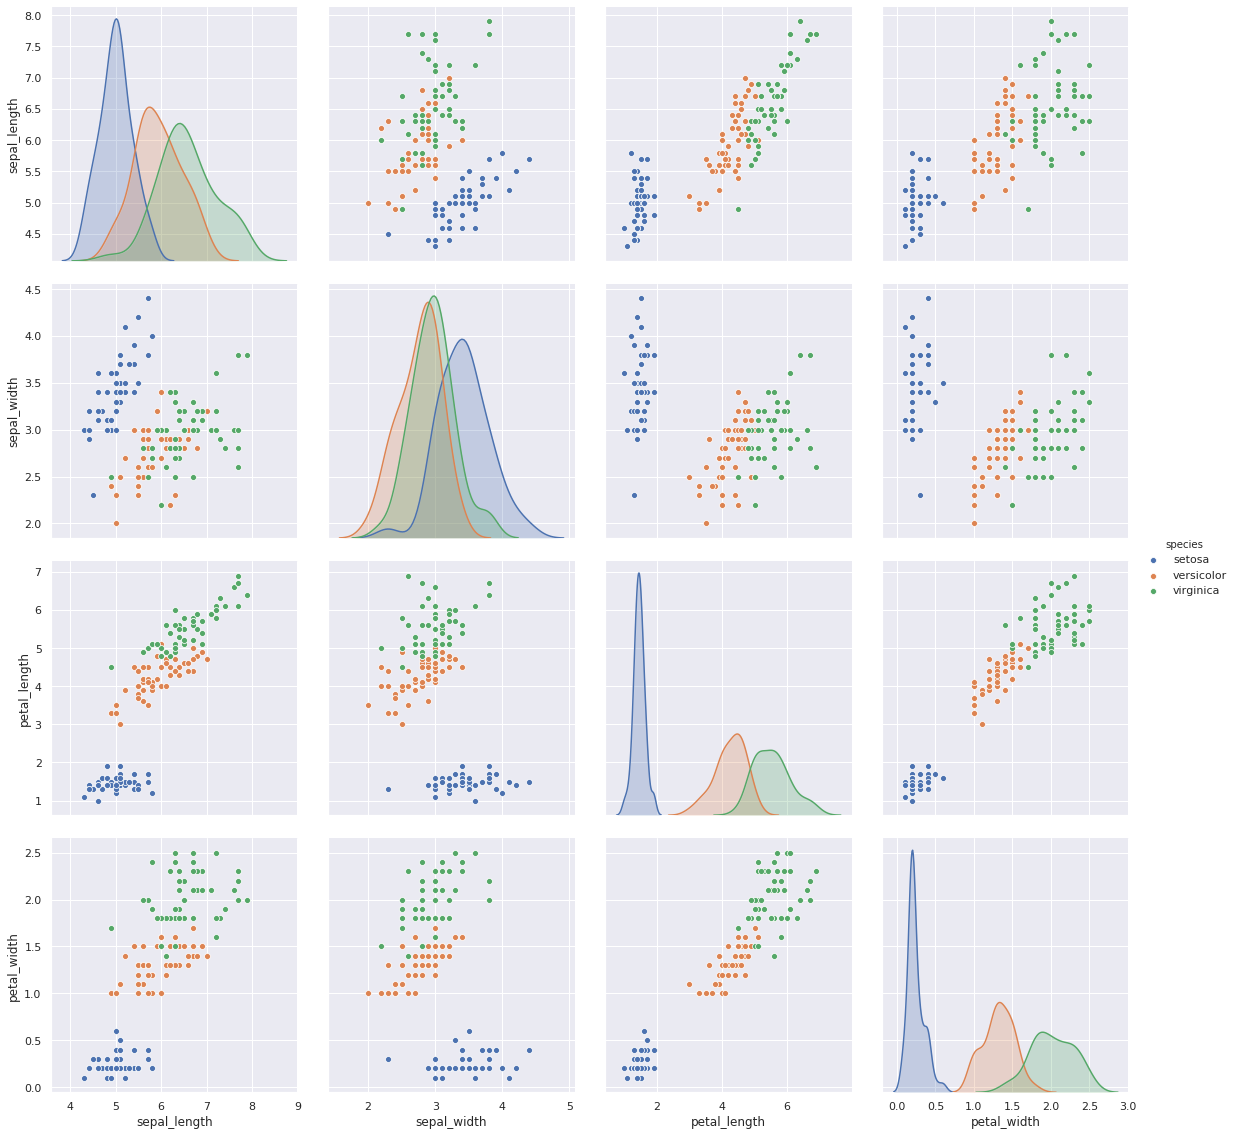

In [34]:
sb.pairplot(iris, hue = 'species', size=4)

Sometime best way to view data is via histogram of subsets. Seaborn's <span style="background-color: #FFFF00">FaceGrid</span> makes this extremely simple. 

In [36]:
tips = sb.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


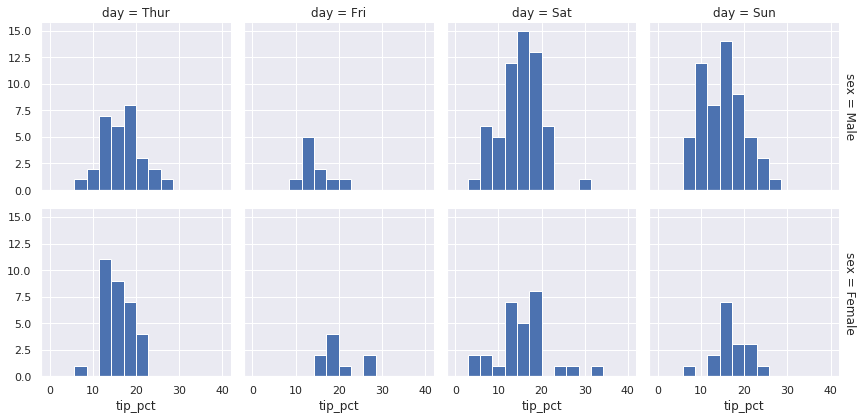

In [57]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sb.FacetGrid(tips, row="sex", col="day", margin_titles=True)
grid.map(plt.hist,'tip_pct', bins=np.linspace(0, 40, 15));

Cat Plot can be used to visualize this data as well. This allows you to view the distribution of a parameter within bins defined by any other parameter

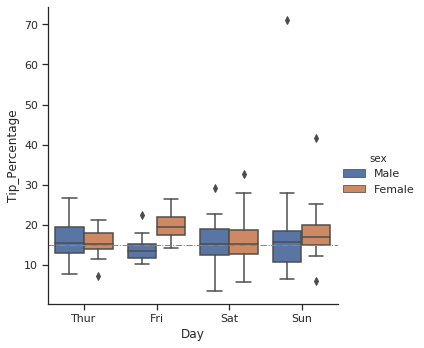

In [83]:
with sb.axes_style(style='ticks'):
    
    g = sb.catplot("day", "tip_pct", "sex", data=tips, kind="box")
    
    g.set_axis_labels("Day", "Tip_Percentage");
    ax = g.axes[0]
    plt.axhline(15,ls='-.',c='g', linewidth=1)
    
    

## Joint Distributions
Similar to the pairlot,we can use <span style="background-color: #FFFF00">sb.jointplot</span> to show the joint distribution between different datasets, along with associated marginal distribution

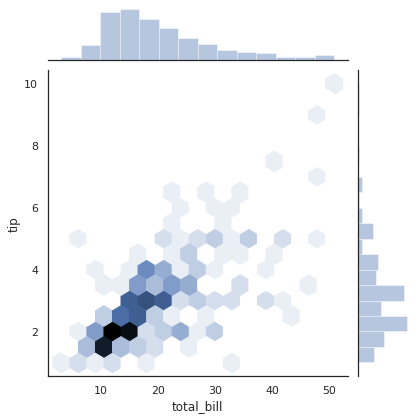

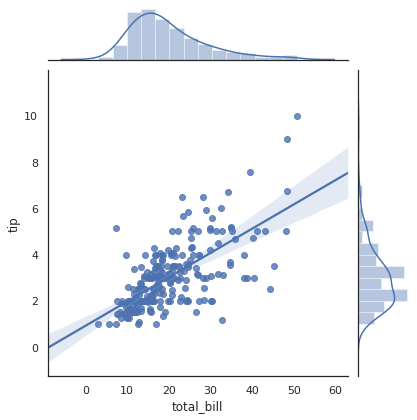

In [85]:
with sb.axes_style('white'):
    sb.jointplot("total_bill","tip",data=tips, kind='hex')
    sb.jointplot("total_bill","tip",data=tips, kind='reg')

## Bar Plot
Time series can be plotted using <span style="background-color: #FFFF00">sb.factorplot</span>

In [86]:
planets = sb.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


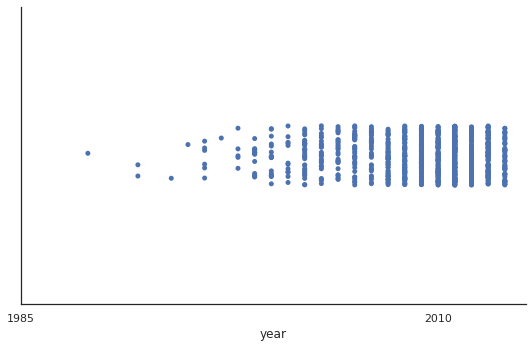

In [88]:
with sb.axes_style('white'):
    g = sb.catplot("year", data = planets, aspect=1.5)
    g.set_xticklabels(step=5)

## Visualizing Statistical Relationship
    1. relplot()
        a. scatterplot() (with kind="scatter", the default)
        b. lineplot() (with kind="line")
Here we will be dealing with numerical data. We will deal with categorical data later on.

In [92]:
sb.set(style="darkgrid")

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


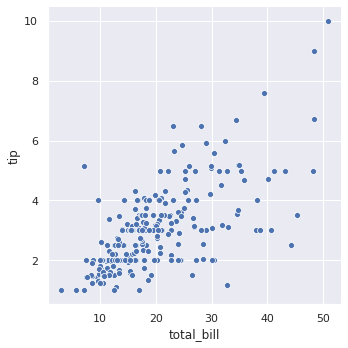

In [96]:

tips = sb.load_dataset("tips")
print(tips.head())
sb.relplot(x="total_bill",y="tip", data =tips)

## Lets try to plot data with 3 info. tip, total bill and sex

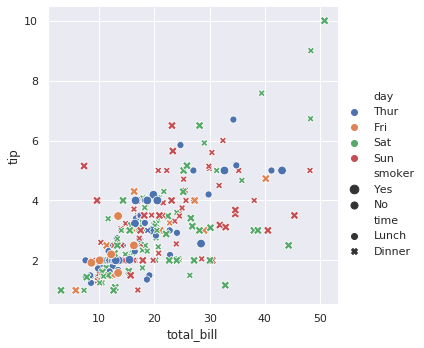

In [108]:
sb.relplot(x="total_bill", y="tip", hue="day",style="time", data=tips,size="smoker",sizes=(50,75) );

## Emphasizing continuity with line plots


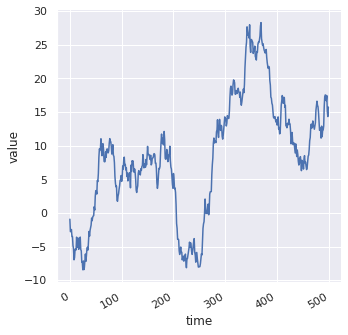

In [111]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sb.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()


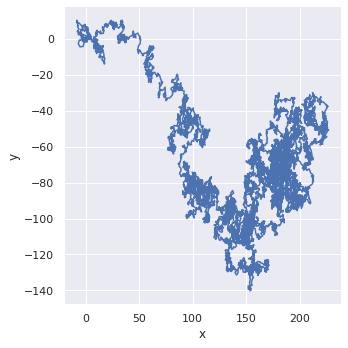

In [120]:
df = pd.DataFrame(np.random.randn(10000, 2).cumsum(axis=0), columns=["x", "y"])
sb.relplot(x="x", y="y", sort=False, kind="line", data=df);

## Aggregation and representing Uncertainty
More complex datasets will have multiple measurement for the same value of the <span style="color:blue">x</span> variable. The default behavior in seaborn is to aggregrate the multiple measurement at each ,<span style = "color:blue">x</span> value by plotting teh mean and the 95% confidence around the mean.

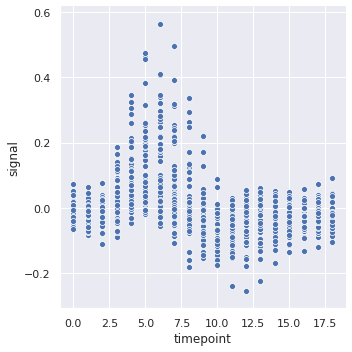

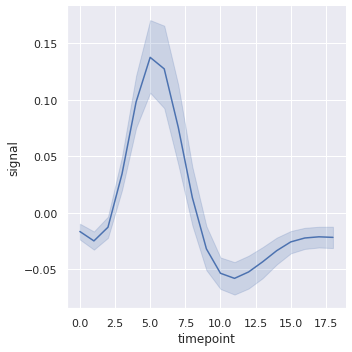

In [135]:
fmri = sb.load_dataset("fmri")
sb.relplot(x="timepoint", y="signal", kind="scatter", data=fmri);
sb.relplot(x="timepoint", y="signal", kind="line", data=fmri);


The confidence interval is computed usnig bootstrapping, which is time-intensive. So, we can disable them

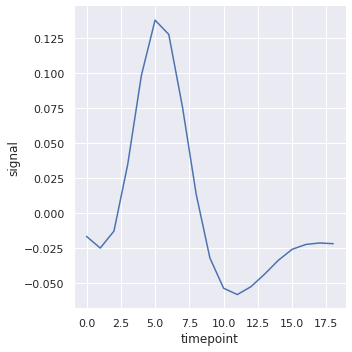

In [140]:
sb.relplot(x="timepoint",y="signal",ci=None,kind="line",data=fmri)

In [142]:
help(sb.relplot)

Help on function relplot in module seaborn.relational:

relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing relational plots onto a FacetGrid.
    
    This function provides access to several different axes-level functions
    that show the relationship between two variables with semantic mappings
    of subsets. The ``kind`` parameter selects the underlying axes-level
    function to use:
    
    - :func:`scatterplot` (with ``kind="scatter"``; the default)
    - :func:`lineplot` (with ``kind="line"``)
    
    Extra keyword arguments are passed to the underlying function, so you
    should refer to the documentation for each to see kind-specific options.

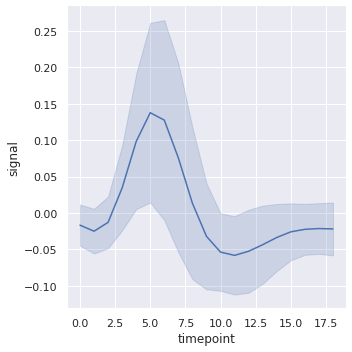

In [143]:
sb.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);


If we don want to take mean, we can turn off the aggregration together by setting <span style = "color:blue">estimator</span> parameter to <span style = "color:blue"> None </span>.

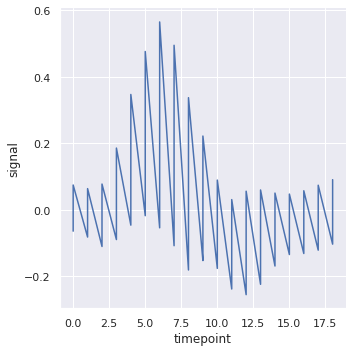

In [144]:
sb.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

Plotting different information in same line plot

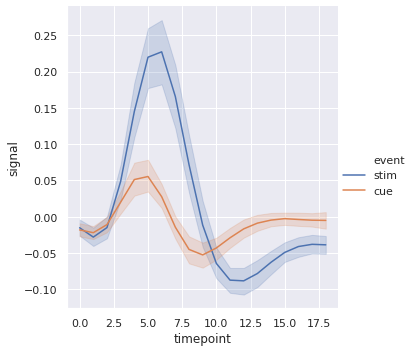

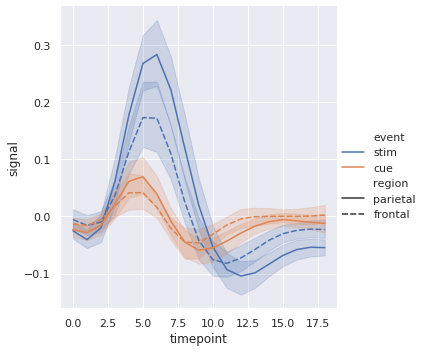

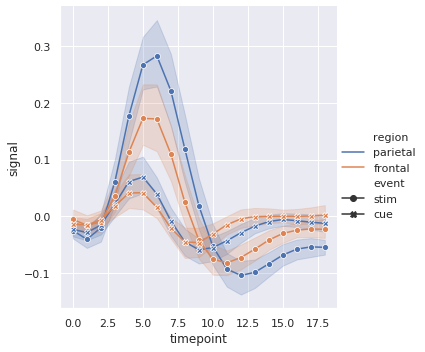

In [154]:
sb.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);
sb.relplot(x="timepoint", y="signal", hue="event", kind="line", style="region", data=fmri);
sb.relplot(x="timepoint", y="signal", hue="region", kind="line", style="event",data=fmri,\
           dashes=False,markers=True);

## Showing muliple relationship with facets

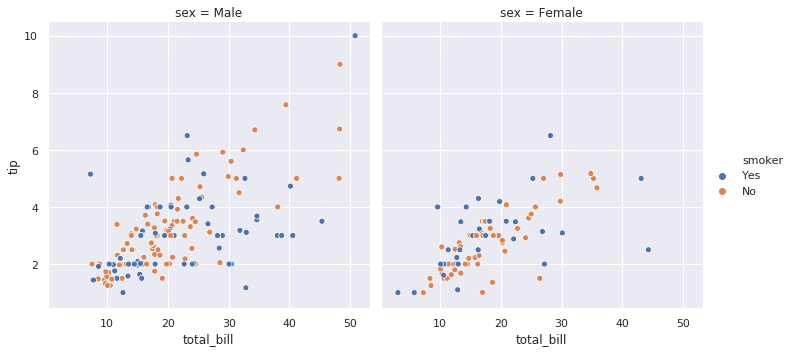

In [158]:
sb.relplot(x="total_bill", y="tip", hue="smoker",
            col="sex", data=tips);

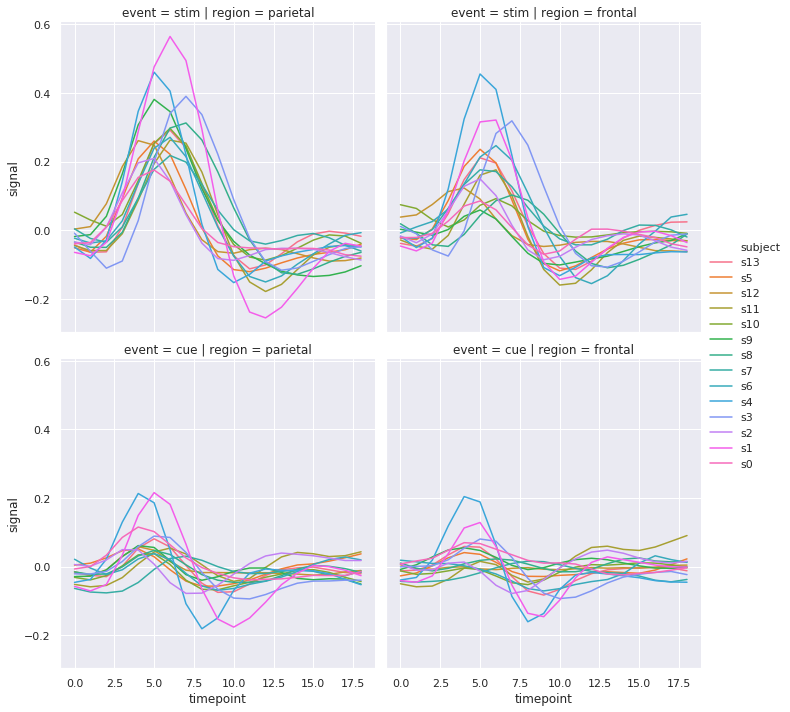

In [163]:
sb.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=5,
            kind="line", estimator=None, data=fmri);

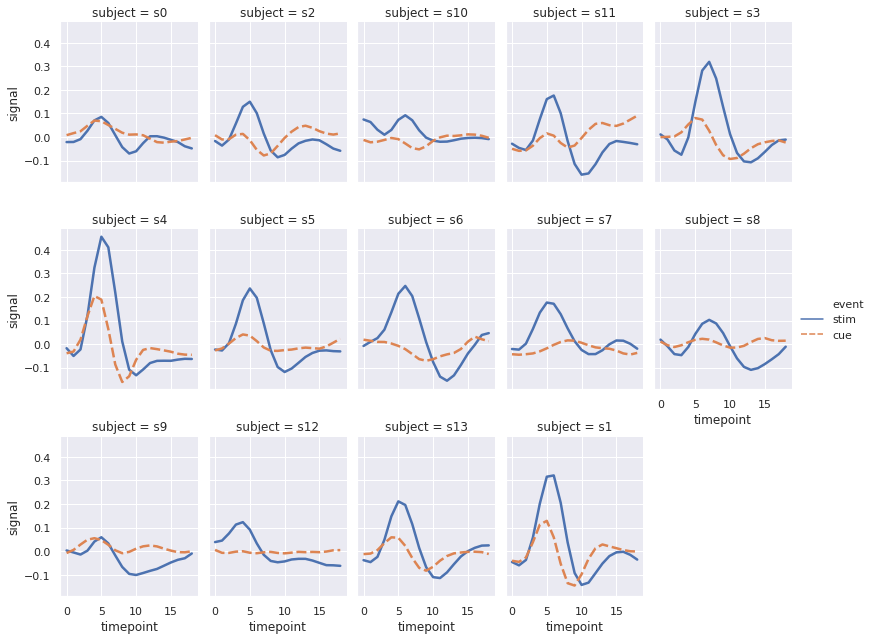

In [164]:
sb.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

## Plotting with categorical data

For categorical data we use <span style="color:blue" > catplot </span>.
The different categorical plots are
    1. Categorical Scatterplots
        a. stripplot() (with kind="strip"; the default)
        b swarmplot() (with kind="swarm")
    2. Categorical distribution plots
        a. boxplot() (with kind = "box")
        b. violinplot() (with kind = "violin")
        c. boxenplot() (with kind = "boxen")
    3. Categorical estimate plots:
        a. pointplot() (with kind="point")
        b. barplot() (with kind="bar")
        c.countplot() (with kind="count")

In [165]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(style="ticks", color_codes=True)



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


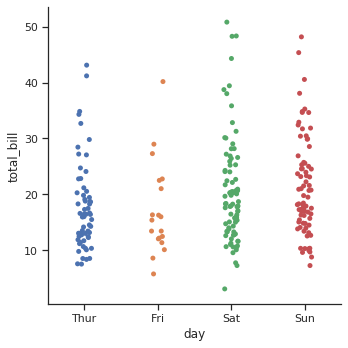

In [176]:
tips = sb.load_dataset("tips")
sb.catplot(x="day", y="total_bill", data=tips);
tips.head()

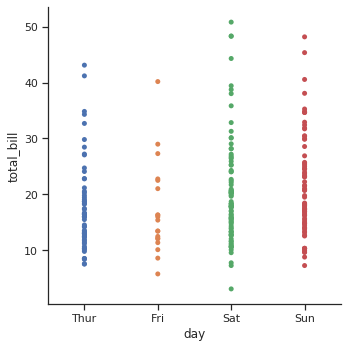

In [167]:
sb.catplot(x="day", y="total_bill", jitter=False, data=tips);

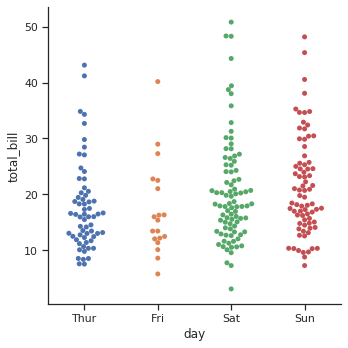

In [169]:
sb.catplot(x="day", y="total_bill", kind="swarm", data=tips);

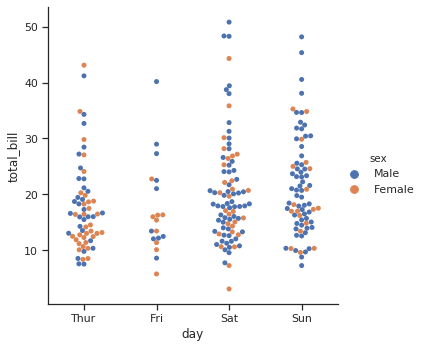

In [171]:
sb.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

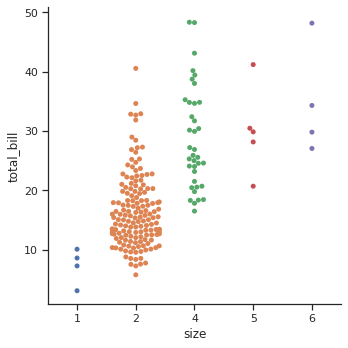

In [172]:
sb.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

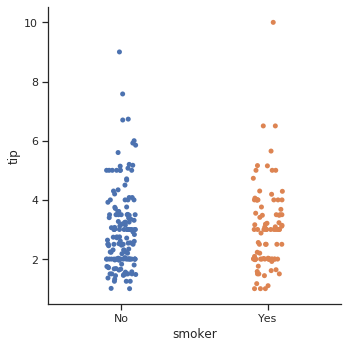

In [173]:
sb.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

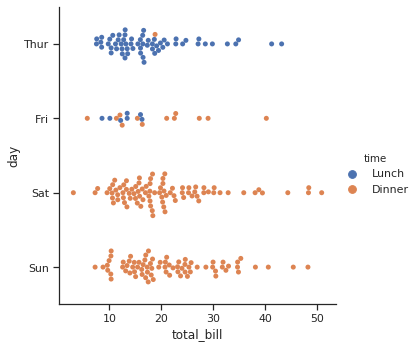

In [178]:
sb.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

## Distribution of observations within categories

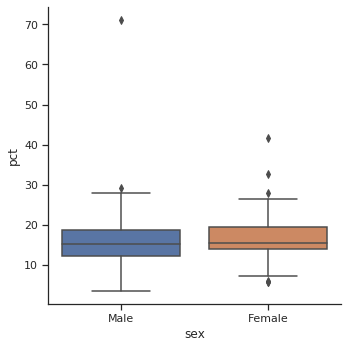

In [184]:
tips["pct"] = 100 * tips["tip"]/tips["total_bill"]
sb.catplot(x="sex", y="pct", kind="box", data=tips);

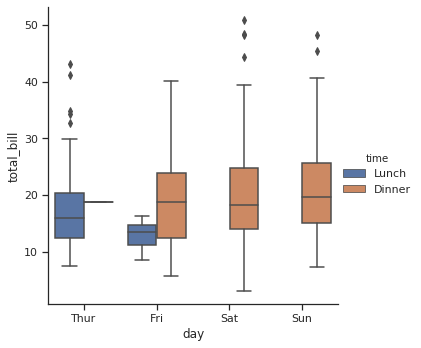

In [187]:
sb.catplot(x="day", y="total_bill", hue="time", kind="box", data=tips);

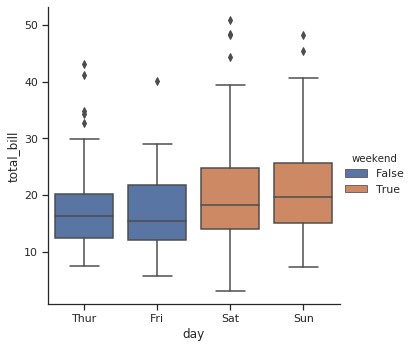

In [188]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sb.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

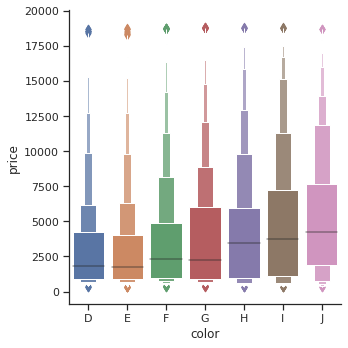

In [189]:
diamonds = sb.load_dataset("diamonds")
sb.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

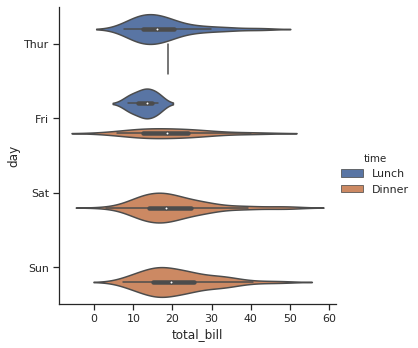

In [190]:
sb.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

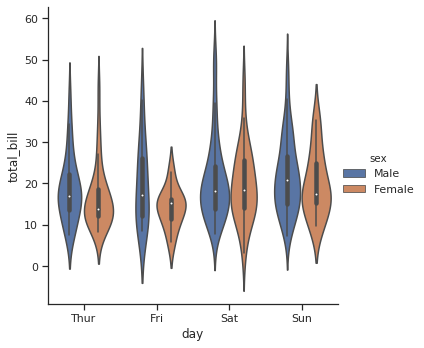

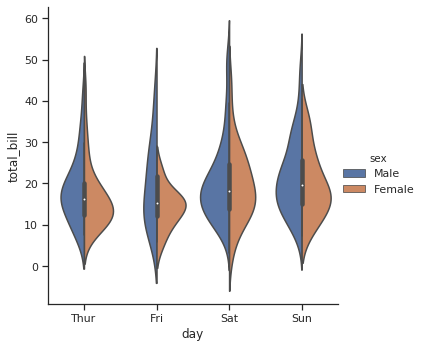

In [192]:
sb.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=False, data=tips);
sb.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

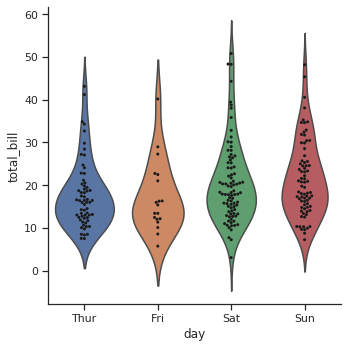

In [193]:


g = sb.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sb.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);



## Statistical Estimation within categories
#### Bar Plot

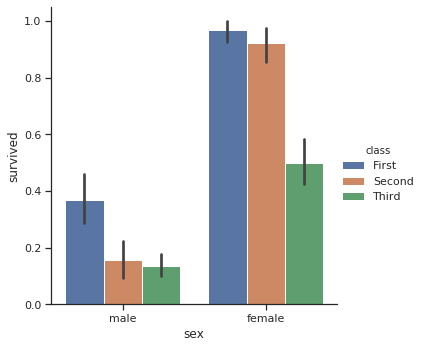

In [194]:
titanic = sb.load_dataset("titanic")
sb.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

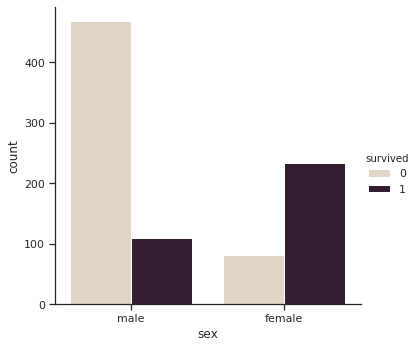

In [208]:
sb.catplot(x="sex", kind="count",hue="survived", palette="ch:.25", data=titanic);

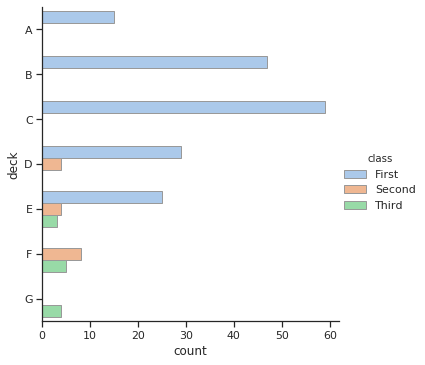

In [201]:
sb.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);